## EDA

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
# plt.rc('font', family='NanumBarunGothic')
# 맥북은 아래
plt.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [34]:
df = pd.read_csv('../data/data/합천_댐기상종합.csv', index_col=0)
df.index = pd.to_datetime(df.index)

In [35]:
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True

In [36]:
df.loc[df.index.day==1, ['강우량금일']].values
for year in range(2000, 2024):
        for month in range(1,13):
                start_date = dt.datetime(year, month, 1)  # 시작 날짜 (6월 21일)
                if start_date<dt.datetime(2023,5,1):
                        df.loc[start_date, '금년누계강우량']=df.loc[start_date, '강우량금일']

In [37]:
df.loc[df.index.day==1,['금년누계강우량']]

,금년누계강우량
2000-01-01,0.0
2000-02-01,0.0
2000-03-01,0.0
2000-04-01,0.0
2000-05-01,0.0
...,...
2022-12-01,0.0
2023-01-01,0.0
2023-02-01,0.0
2023-03-01,0.0


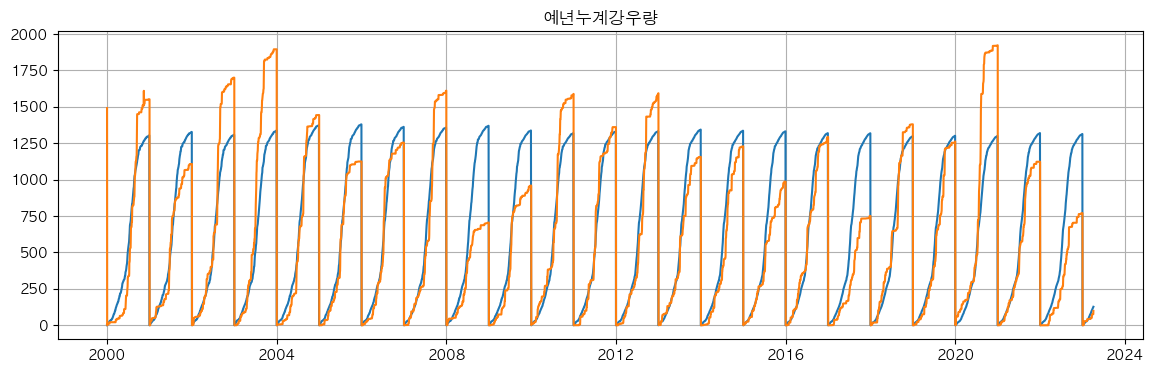

In [7]:
plt.plot(df.index, df['예년누계강우량'])
plt.plot(df.index, df['금년누계강우량'])

plt.title('예년누계강우량')
plt.show()

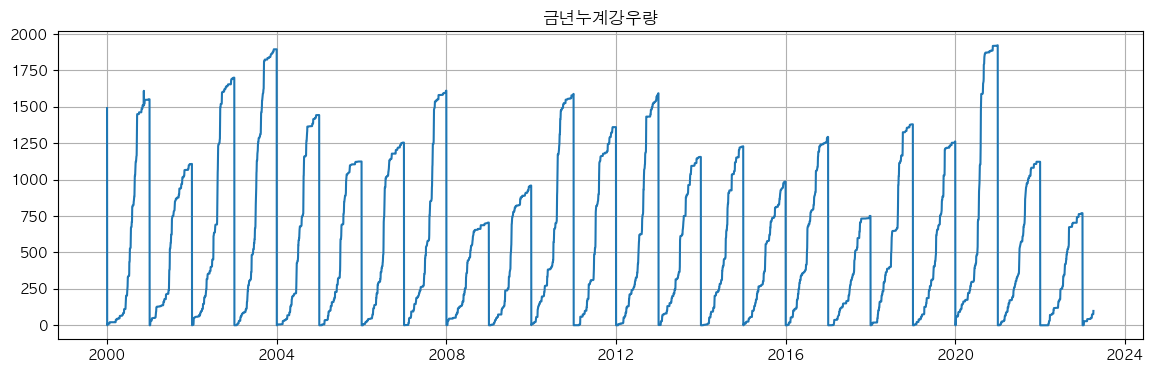

In [6]:
plt.plot(df.index, df['금년누계강우량'])
plt.title('금년누계강우량')
plt.show()


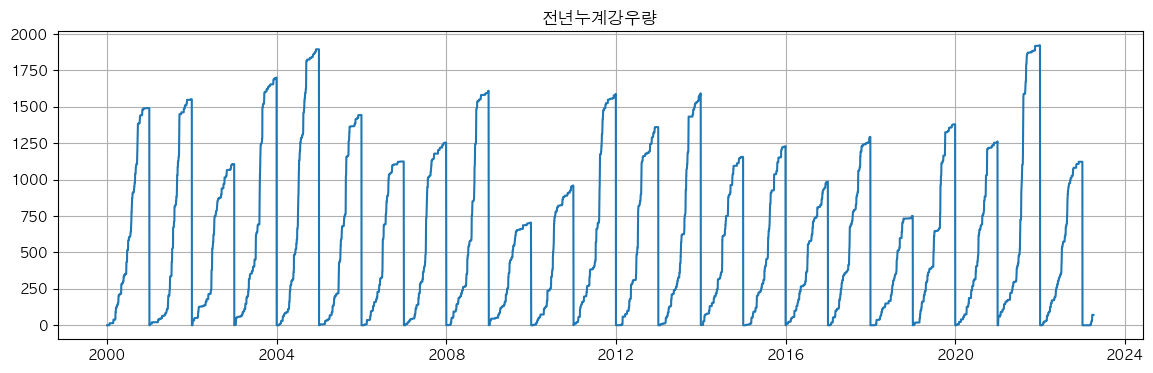

In [11]:
plt.plot(df.index, df['전년누계강우량'])
plt.title('전년누계강우량')
plt.show()

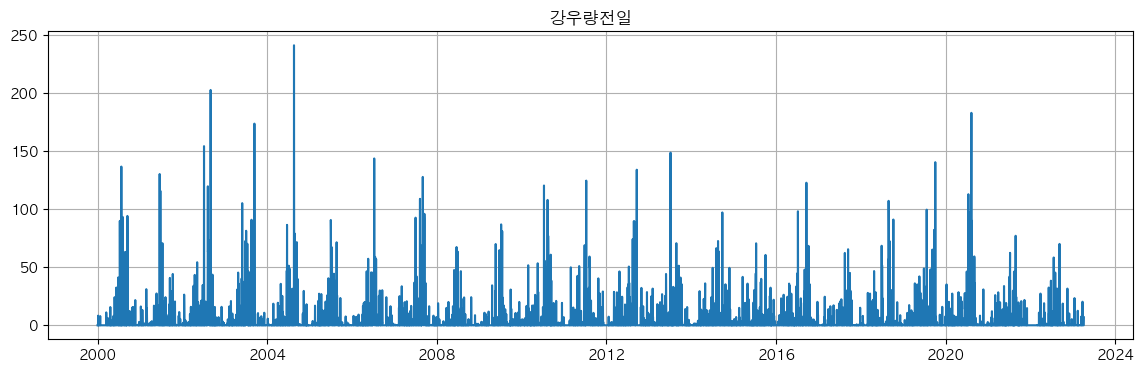

In [12]:
plt.plot(df.index, df['강우량전일'])
plt.title('강우량전일')
plt.show()

#전일 최종 강우량

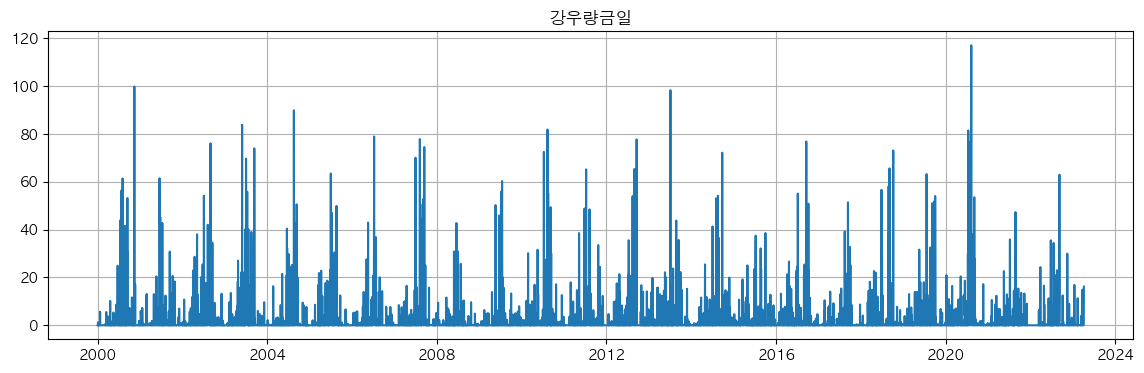

In [13]:
plt.plot(df.index, df['강우량금일'])
plt.title('강우량금일')
plt.show()

#실시간 강우량

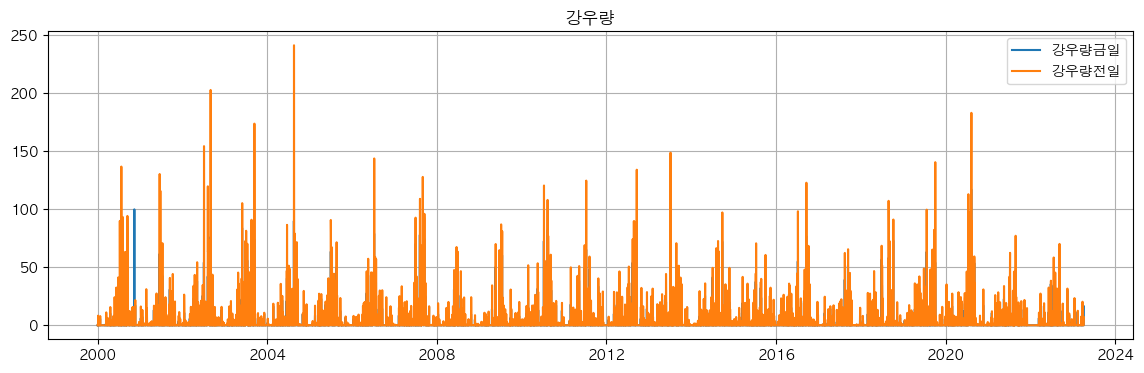

In [14]:
plt.plot(df['강우량금일'], label='금일')
plt.plot(df['강우량전일'], label='전일')
plt.title('강우량')
plt.legend(['강우량금일','강우량전일'])
plt.show()

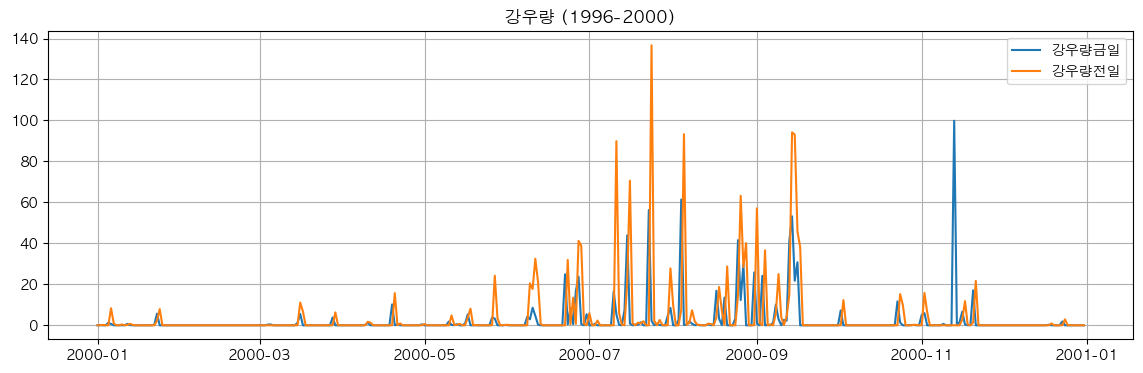

In [15]:
plt.plot(df[df.index.year <= 2000]['강우량금일'])
plt.plot(df[df.index.year <= 2000]['강우량전일'])
plt.title('강우량 (1996-2000)')
plt.legend(['강우량금일','강우량전일'])
plt.show()

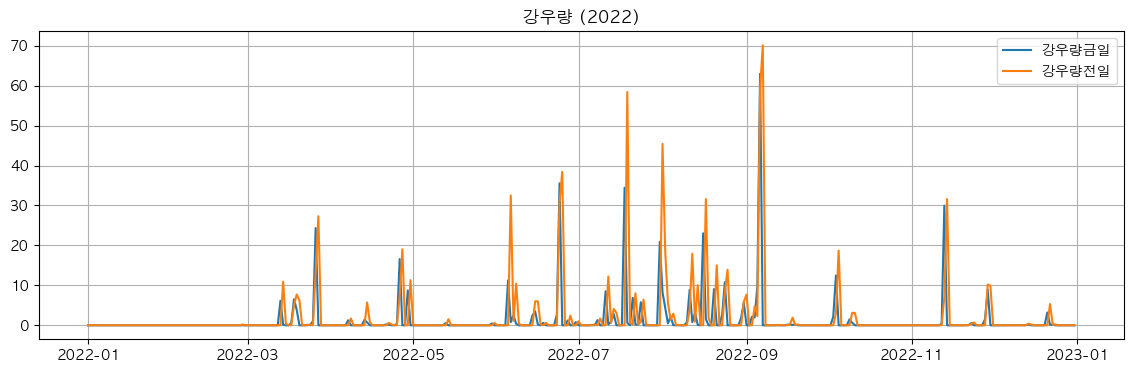

In [16]:
plt.plot(df[df.index.year == 2022]['강우량금일'])
plt.plot(df[df.index.year == 2022]['강우량전일'])
plt.title('강우량 (2022)')
plt.legend(['강우량금일','강우량전일'])
plt.show()

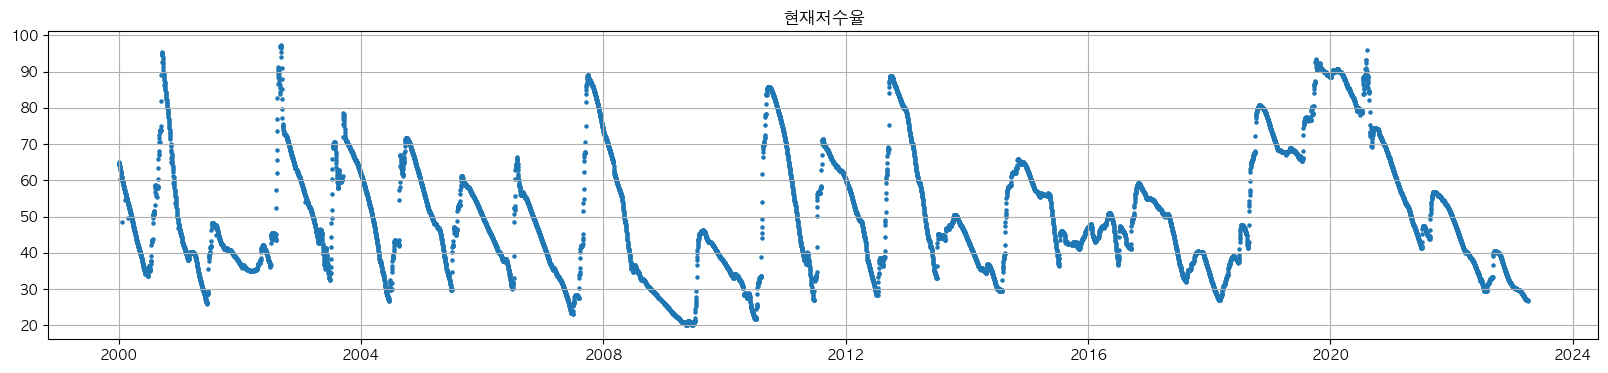

In [18]:
plt.rcParams["figure.figsize"] = (20,4)
plt.scatter(df.index, df['현재저수율'], s=5)
plt.title('현재저수율')
plt.show()

#2019년에 저수율이 충분히 안 떨어짐

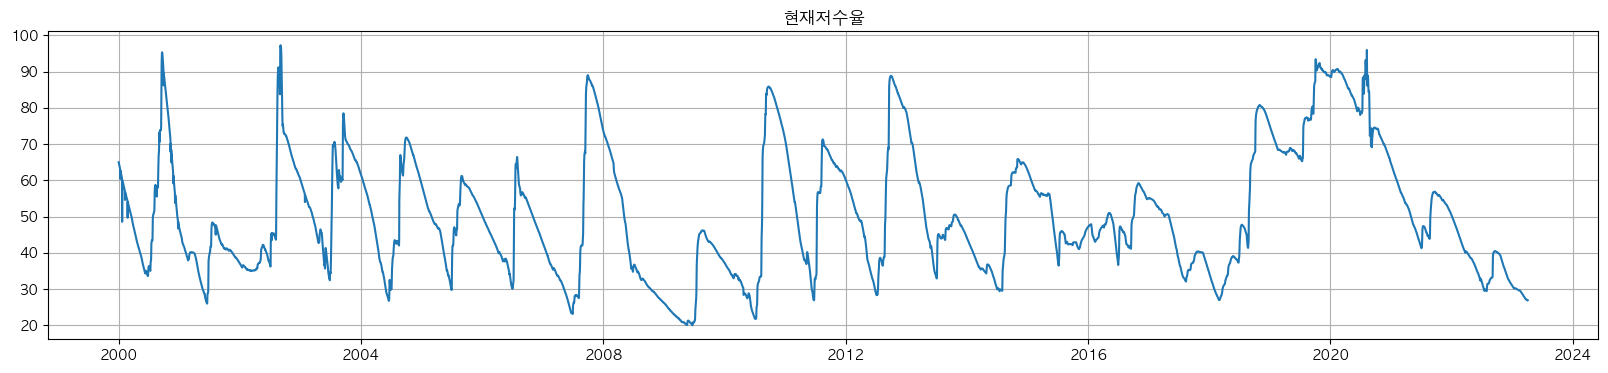

In [19]:
plt.plot(df['현재저수율'])
plt.title('현재저수율')
plt.show()

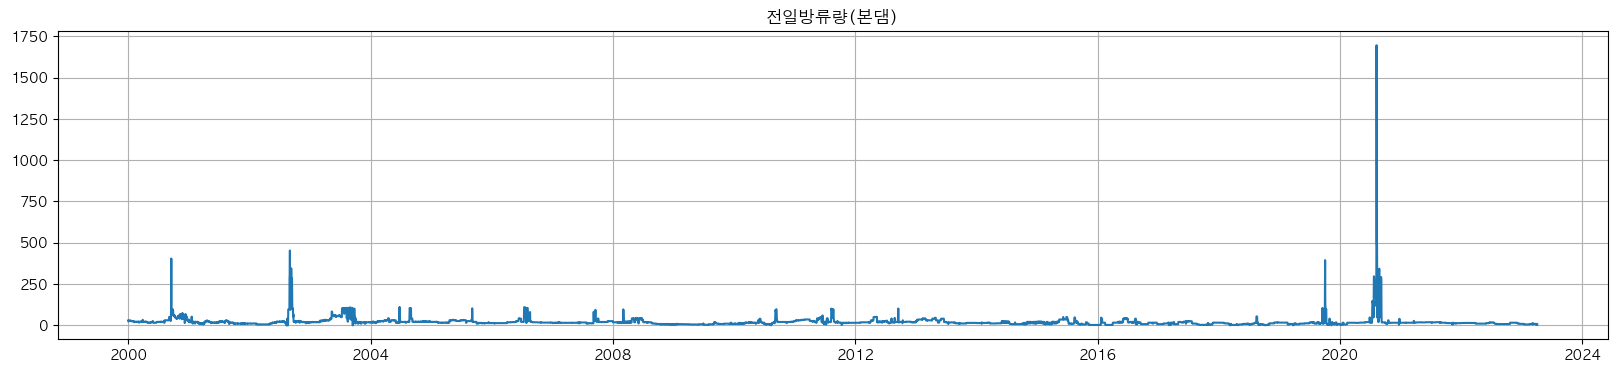

In [20]:
plt.plot(df['전일방류량(본댐)'])
plt.title('전일방류량(본댐)')
plt.show()

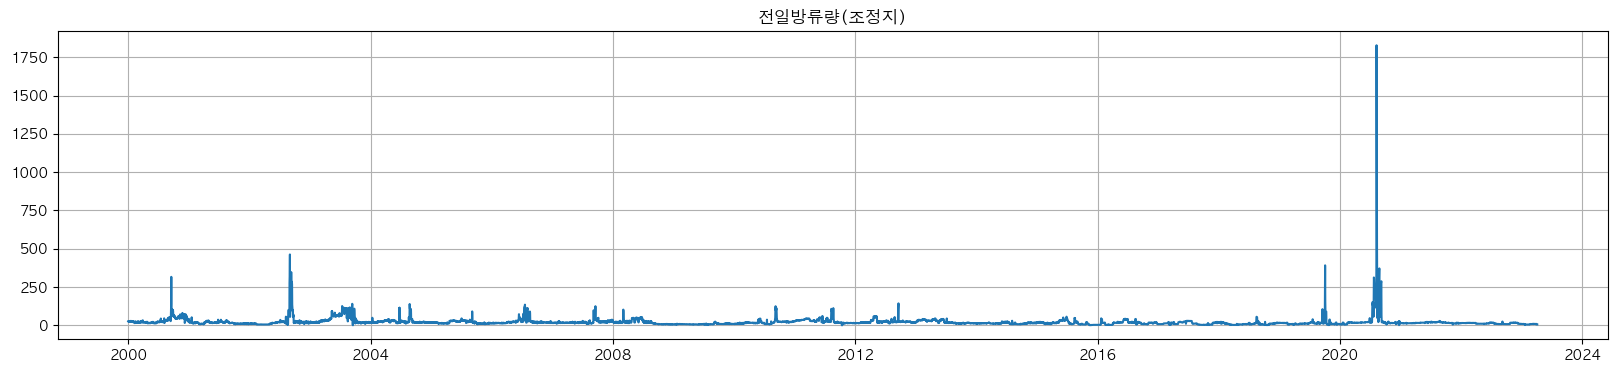

In [21]:
plt.plot(df['전일방류량(조정지)'])
plt.title('전일방류량(조정지)')
plt.show()

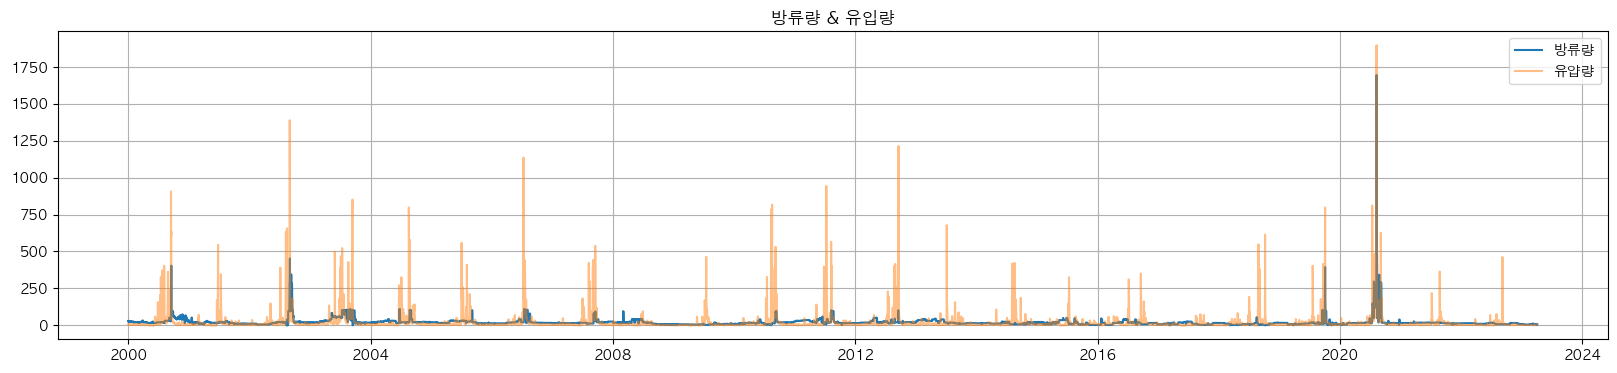

In [22]:
plt.plot(df['전일방류량(본댐)'])
plt.plot(df['전일유입량'], alpha=0.5)
plt.title('방류량 & 유입량')
plt.legend(['방류량', '유얍량'])
plt.show()

#유입량이 많다고 방류량이 반드시 그만큼이나... 오르진 않음

### 연별누계강우량

- 금년누계강우량: 1월2일~12월31일
- 예년&전년누계강우량: 1월1일~12월30일

In [23]:
df_acc = df[(pd.DatetimeIndex(df.index).month == 12) & (pd.DatetimeIndex(df.index).day == 30) & (pd.DatetimeIndex(df.index).hour == 23)]

In [24]:
df_acc = df_acc.loc[:,['예년누계강우량', '금년누계강우량', '전년누계강우량']]

In [ ]:
#fig = plt.figure(figsize=(14,4))
#ax1 = fig.add_subplot()

df_acc['금년누계강우량'].plot.bar() # -> bar
df_acc['예년누계강우량'].plot(marker='o')

#plt.bar(df_acc.index, df_acc['금년누계강우량'])
#plt.plot(df_acc.index, df_acc['예년누계강우량'], marker='o')
plt.legend(['금년누계강우량','예년누계강우량'])
plt.title('누계강우량')
plt.show()

In [26]:
df[df.index.year == 2012].loc[:,['예년누계강우량', '금년누계강우량', '전년누계강우량']]

,예년누계강우량,금년누계강우량,전년누계강우량
2012-01-01,0.3,1360.900000,0.0
2012-01-02,0.5,0.000000,0.2
2012-01-03,0.7,0.000000,0.3
2012-01-04,1.3,0.000000,0.5
2012-01-05,2.8,0.000000,0.5
...,...,...,...
2012-12-27,1332.7,1581.300000,1360.9
2012-12-28,1332.7,1588.016667,1360.9
2012-12-29,1332.9,1591.366667,1360.9
2012-12-30,1332.9,1592.700000,1360.9


## EDA (일별데이터)

In [ ]:
#한글을 plot에 나타내기 위해 사용할 한글 폰트를 불러와서 적용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#런타임 다시 시작

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (20,4)
plt.rcParams['axes.grid'] = True

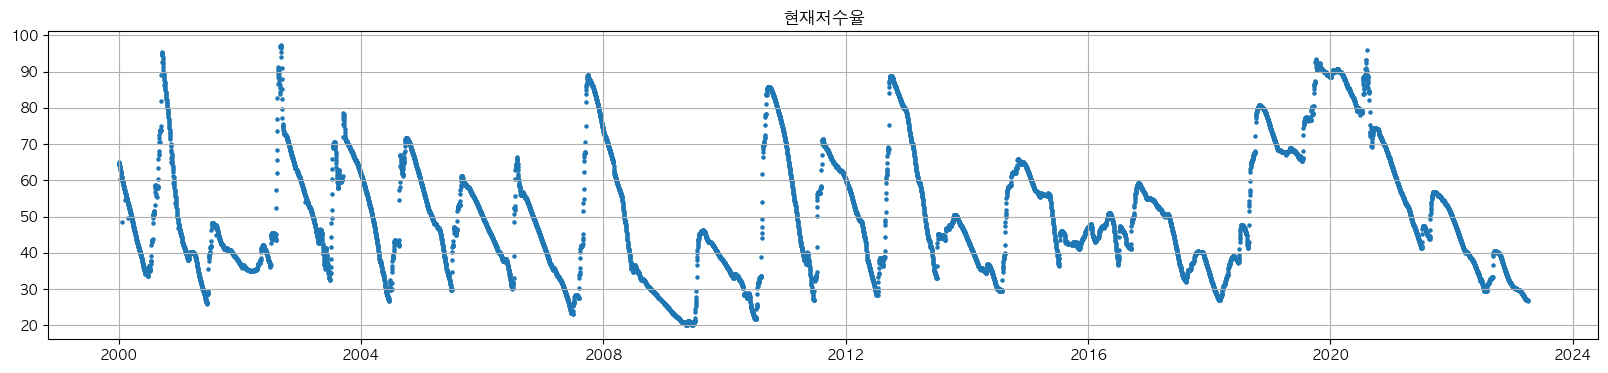

In [30]:
plt.scatter(df.index, df['현재저수율'], s=5)
plt.title('현재저수율')
plt.show()

#물이 차는 건 홍수기(3개월) 동안이라 빠르고 빠지는 건 갈수기라 느린가?

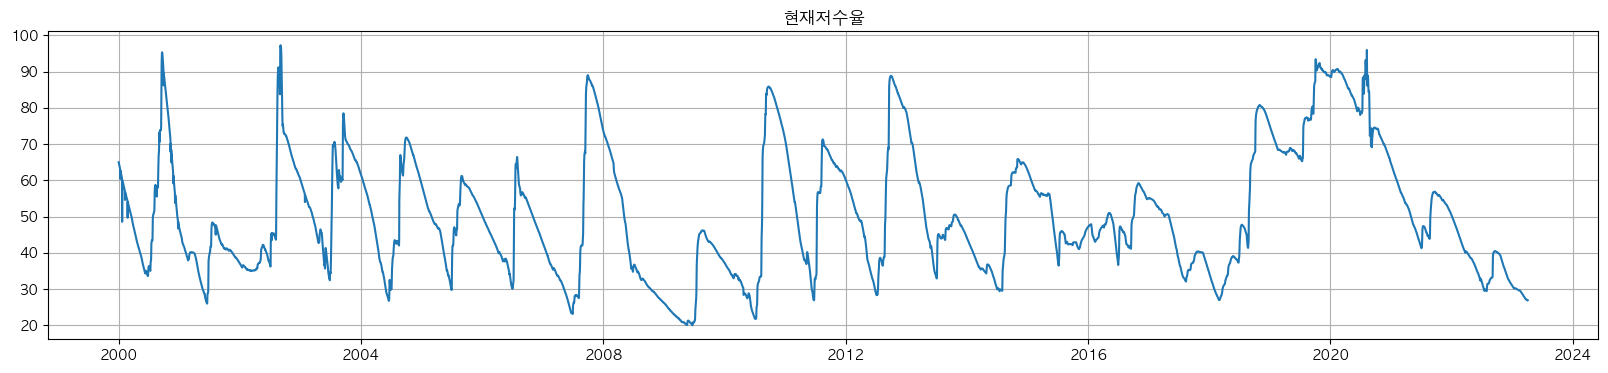

In [31]:
plt.plot(df['현재저수율'])
plt.title('현재저수율')
plt.show()

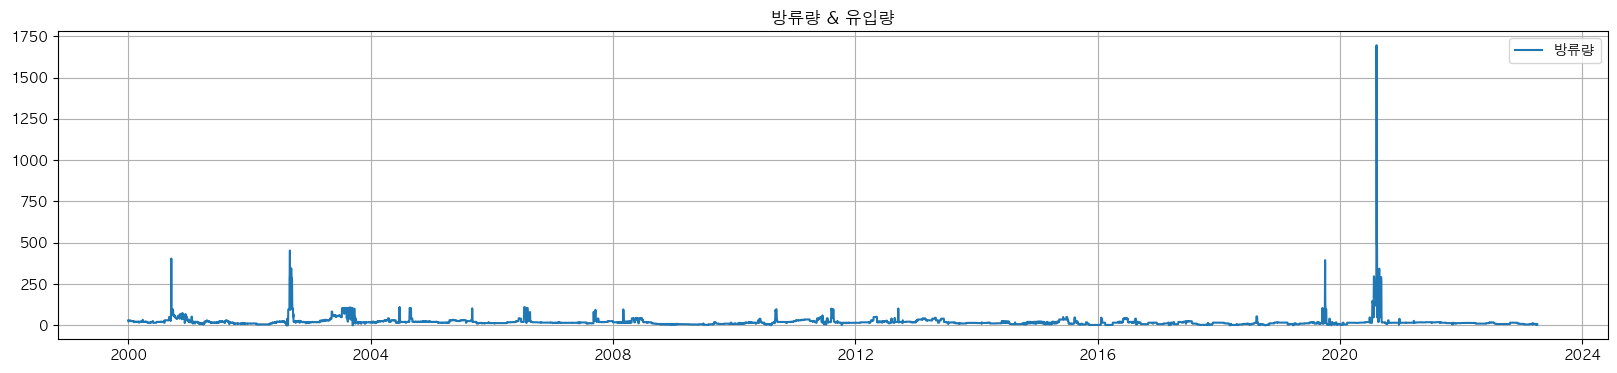

In [32]:
plt.plot(df['전일방류량(본댐)'])
#plt.plot(df['전일유입량'], alpha=0.5)
#plt.plot(df['강우량전일'])
plt.title('방류량 & 유입량')
plt.legend(['방류량', '유얍량'])
plt.show()

## 댐 데이터 정리
- [x] 실시간데이터&강우량 열 삭제
- [x] 2-7일 전 유입량 열 추가
- [ ] 기상 데이터랑 합치기
- [ ] 강우량 대비 유입량 EDA

In [ ]:
#한글을 plot에 나타내기 위해 사용할 한글 폰트를 불러와서 적용
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

#런타임 다시 시작

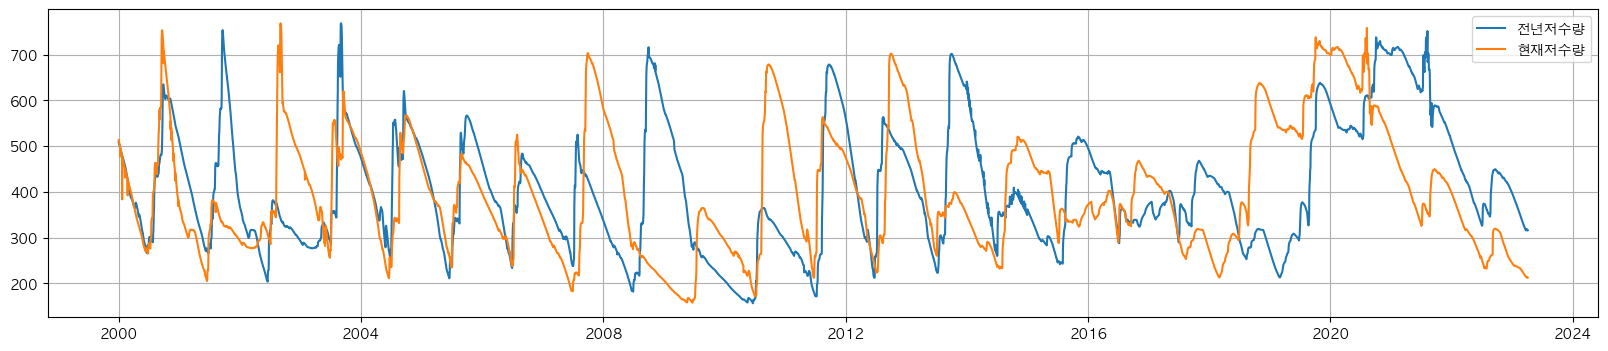

In [33]:
plt.plot(df['저수량(전년)'])
plt.plot(df['저수량(현재)'])
plt.legend(['전년저수량', '현재저수량'])
plt.show()

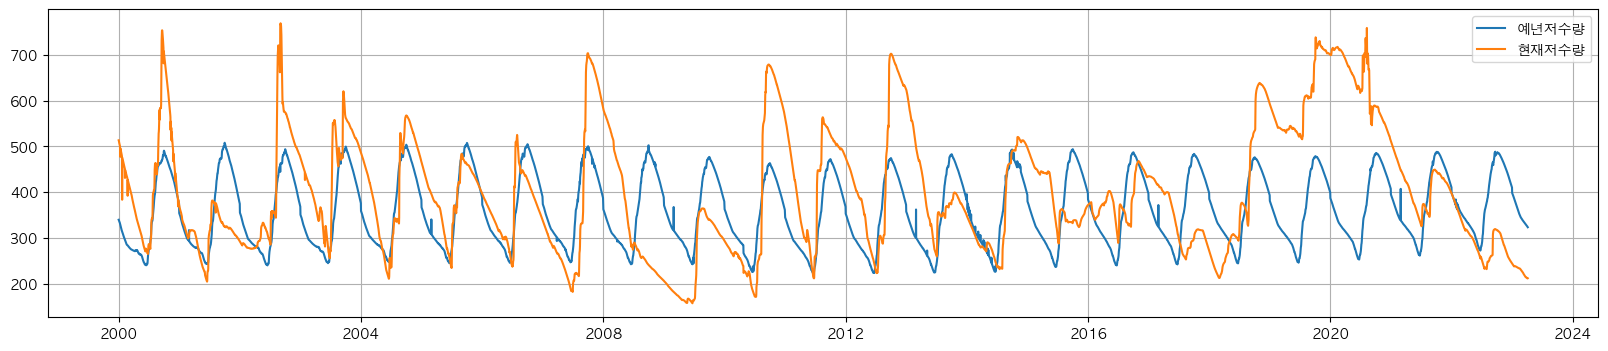

In [34]:
plt.plot(df['저수량(예년)'])
plt.plot(df['저수량(현재)'])
plt.legend(['예년저수량', '현재저수량'])
plt.show()

In [35]:
# 전년과의 비교보단 예년과의 비교가 의미있어보임
df['저수량차이'] = df['저수량(현재)'] - df['저수량(예년)']

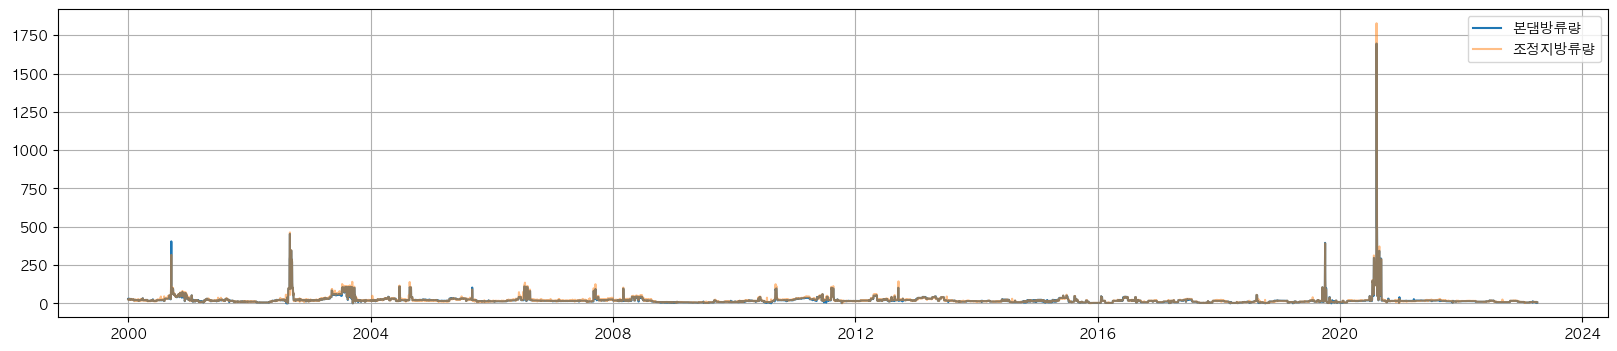

In [37]:
plt.plot(df['전일방류량(본댐)'])
plt.plot(df['전일방류량(조정지)'], alpha=0.5)
plt.legend(['본댐방류량', '조정지방류량'])
plt.show()

In [38]:
df.drop('전일방류량(조정지)', axis=1, inplace=True)
df.head()

,발전량(실적),발전량(계획),연간발전계획,저수위(전년),저수량(전년),저수위(현재),저수량(현재),저수위(예년),저수량(예년),예년누계강우량,...,증기압(hPa),이슬점온도(°C),현지기압(hPa),해면기압(hPa),일조(hr),적설(cm),최저운고(100m ),시정(10m),지면온도(°C),저수량차이
2000-01-01,0.0,0.0,0.0,166.63,508.5,166.892500,513.350000,155.19,340.0,0.6,...,5.237500,-2.562500,1022.395833,1026.575000,0.229167,0.3,10.00,1593.750000,3.864583,173.350000
2000-01-02,0.0,0.0,0.0,166.55,507.1,166.822500,512.137500,155.13,339.1,0.6,...,6.612500,0.887500,1013.941667,1018.020833,0.087500,0.3,10.00,1329.166667,5.345833,173.037500
2000-01-03,0.0,0.0,0.0,166.48,505.8,166.699167,509.795833,155.06,338.0,1.0,...,3.625000,-7.058333,1016.700000,1020.891667,0.393333,0.3,10.00,1764.583333,2.275000,171.795833
2000-01-04,0.0,0.0,0.0,166.40,504.3,166.620417,508.370833,154.99,337.0,1.8,...,3.370833,-7.879167,1020.979167,1025.204167,0.361667,0.3,10.00,1612.500000,1.862500,171.370833
2000-01-05,0.0,0.0,0.0,166.34,503.2,166.519583,506.537500,154.93,336.1,3.5,...,5.158333,-2.991667,1017.450000,1021.616667,0.061667,0.3,10.75,1283.333333,3.862500,170.437500


In [42]:
for i in range(1, 7):
  a = [None for j in range(i)]
  b = [j for j in df['전일유입량'][:-i]]
  a.extend(b)
  df['%d일전유입량' %(i+1)] = a

### 미래 유입량 열 추가

In [ ]:
# a = []
# for i in range(1, 4):
#   b = [j for j in df['전일유입량'][i:]]
#   a.append(b)

# toadd = pd.DataFrame(a, index=['당일유입량', '1일후유입량', '2일후유입량'])
# toadd = toadd.transpose()
# toadd.loc[8495] = [None, None, None]
# toadd

In [ ]:
df = pd.concat([df, toadd], axis=1)
df.tail()

In [ ]:
df.interpolate(inplace=True)

In [ ]:
df.to_csv('/content/drive/MyDrive/23_1_데사캡스톤/data/합천다목적댐_일별_0511.csv', index=None)

### EDA

In [43]:
from sklearn.preprocessing import MinMaxScaler

minmax = MinMaxScaler()
scaled = minmax.fit_transform(df)

In [46]:
df_scaled = pd.DataFrame(scaled, columns=df.columns, index=df.index.values)

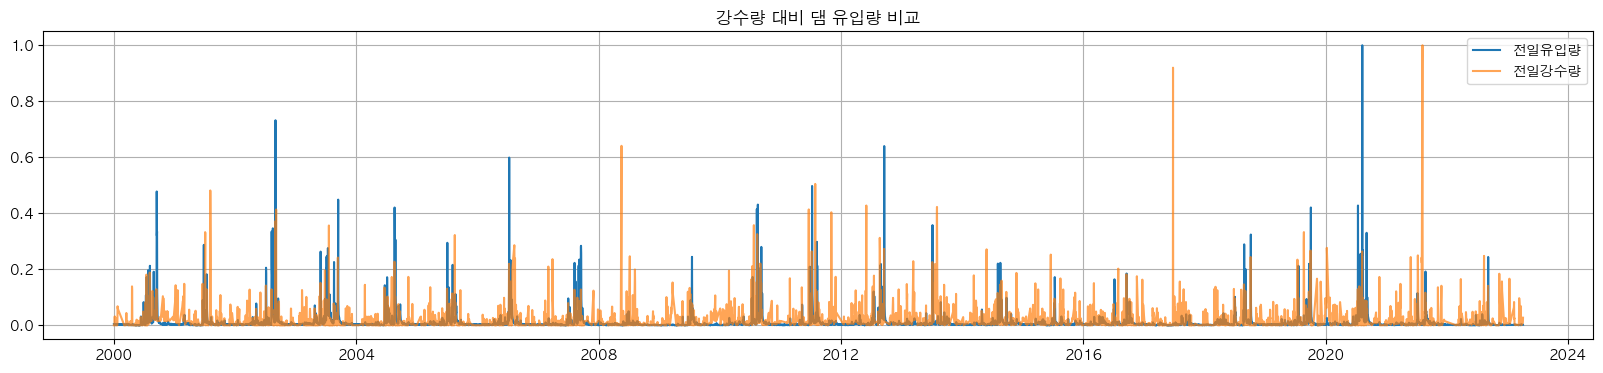

In [49]:
plt.plot(df_scaled['전일유입량'])
plt.plot(df_scaled['강수량(mm)'], alpha=0.7)
#plt.plot(df_scaled['전일방류량(본댐)'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['전일유입량','전일강수량'])
plt.title('강수량 대비 댐 유입량 비교')
plt.show()

- 강수량에 비해 유입량이 적은 해 2009, 2017, 2021
- 강수량에 비해 유입량이 많은 해 2012, 2020

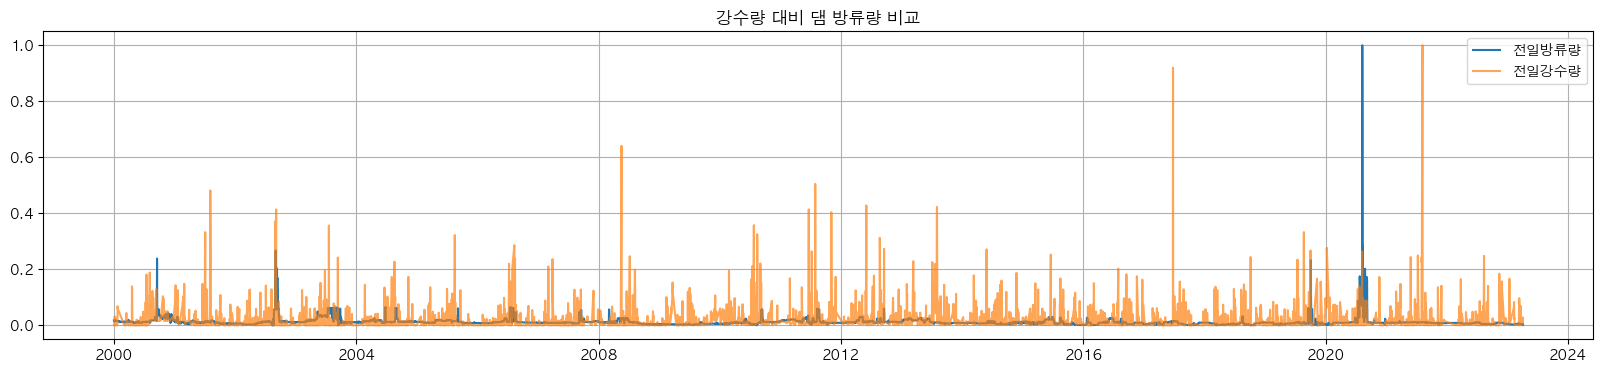

In [50]:
plt.plot(df_scaled['전일방류량(본댐)'])
plt.plot(df_scaled['강수량(mm)'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['전일방류량','전일강수량'])
plt.title('강수량 대비 댐 방류량 비교')
plt.show()

In [ ]:
plt.plot(df_scaled['저수량차이'])
plt.plot(df_scaled['강수량(mm)'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['저수량차이','전일강수량'])
plt.title('예년저수량과의 차이 대비 댐 유입량 비교')
plt.show()

In [ ]:
plt.plot(df_scaled['전일유입량'])
plt.plot(df_scaled['누계강수량'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['전일유입량','누계강수량'])
plt.title('예년저수량과의 차이 대비 댐 유입량 비교')
plt.show()

- 2020년 방류량 때문인지 이건 잘 안 보인다 빼고 그리기?
- 가뭄이었던 기간동안은 방류량이 적음
- 2017년에도 가뭄이었나? 강수에 비해 유입도 방류도 적음
- 2019년에 방류?

In [ ]:
plt.plot(df_scaled['저수량(현재)'])
plt.plot(df_scaled['1일전평균강수량(mm)'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['현재저수량','전일강수량'])
plt.title('강수량 대비 댐 저수량 비교')
plt.show()

In [ ]:
plt.plot(df_scaled['전일유입량'])
plt.plot(df_scaled['1일전평균습도(%)'], alpha=0.7)

#plt.xlim(2000, 2024)
plt.legend(['전일유입량','전일습도(%)'])
plt.title('습도 대비 댐 유입량 비교')
plt.show()